In [ ]:
# 用sklearn.preprocessing.StandardScaler对数据进行标准化

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in np, pd ,sklearn, tf, keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
numpy 1.18.1
pandas 1.0.4
sklearn 0.22.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
x_train.reshape(-1,1).astype(np.float32)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [4]:
# #x = (x - u) / std
# #先将图片转化为一维数组，标准化后在转回图片
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train_scaler = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
# x_test_scaler = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)


In [3]:
# 转化为tensor 并标准化
x_train_scaler = tf.convert_to_tensor(x_train, dtype = tf.float32)/255
x_test_scaler = tf.convert_to_tensor(x_test, dtype=tf.float32)/255


In [4]:
print(np.max(x_train),np.min(x_train))
print(np.max(x_train_scaler),np.min(x_train_scaler))


255 0
1.0 0.0


In [5]:
#tf.keras.models.Sequential()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =[28,28]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])    
# relu:  y=max(0,x)
# softmax:将向量变成概率分布，x =[x1,x2,x3]
#                y=[e^x1/sum,e^x2/sum,e^x3/sum], sum=e^x1+e^x2+e^x36

# sparse的原因：将y的分类转换为one_hot编码
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             optimizer = 'sgd',
             metrics = ['accuracy'])


In [6]:
history = model.fit(x_train_scaler,y_train,epochs=10,
         validation_split=0.2)
#validation_data:训练过程中在验证集验证

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 285us/sample - loss: 0.8161 - accuracy: 0.7325 - val_loss: 0.5917 - val_accuracy: 0.7987
Epoch 2/10
48000/48000 [==============================] - 11s 221us/sample - loss: 0.5462 - accuracy: 0.8157 - val_loss: 0.5115 - val_accuracy: 0.8277
Epoch 3/10
48000/48000 [==============================] - 11s 223us/sample - loss: 0.4935 - accuracy: 0.8319 - val_loss: 0.4790 - val_accuracy: 0.8357
Epoch 4/10
48000/48000 [==============================] - 11s 221us/sample - loss: 0.4659 - accuracy: 0.8400 - val_loss: 0.4665 - val_accuracy: 0.8382
Epoch 5/10
48000/48000 [==============================] - 11s 225us/sample - loss: 0.4473 - accuracy: 0.8455 - val_loss: 0.4431 - val_accuracy: 0.8482
Epoch 6/10
48000/48000 [==============================] - 11s 224us/sample - loss: 0.4314 - accuracy: 0.8518 - val_loss: 0.4318 - val_accuracy: 0.8512
Epoch 7/10
48000/48000 [====================

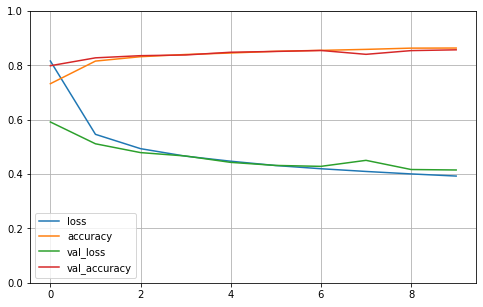

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [8]:
model.evaluate(x_test_scaler, y_test,verbose=2)

10000/1 - 2s - loss: 0.3534 - accuracy: 0.8470


[0.44239695172309873, 0.847]

In [12]:
y_pred = model.predict_classes(x_test_scaler)
y_pred[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0])

In [27]:
for x,y in zip(y_pred[:20], y_test[:20]):
    r = 'r' if x==y else 'wrong'
    print(x,'-',y, ' ',r)

9 - 9   r
2 - 2   r
1 - 1   r
1 - 1   r
6 - 6   r
1 - 1   r
4 - 4   r
6 - 6   r
5 - 5   r
7 - 7   r
4 - 4   r
5 - 5   r
5 - 7   wrong
3 - 3   r
4 - 4   r
1 - 1   r
2 - 2   r
2 - 4   wrong
8 - 8   r
0 - 0   r


In [28]:
model.save('data/modle1.h5')

In [30]:
loaded_model = tf.keras.models.load_model('data/modle1.h5')

In [31]:
loaded_model.evaluate(x_test_scaler, y_test,verbose=2)

10000/1 - 1s - loss: 0.3534 - accuracy: 0.8470


[0.44239695172309873, 0.847]